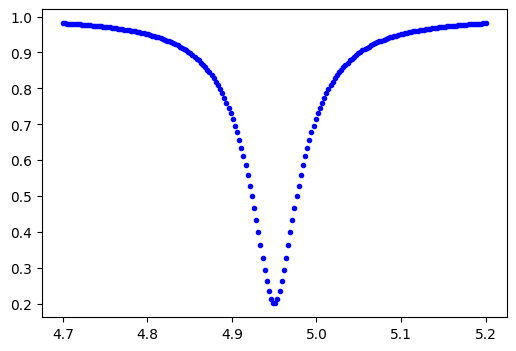

In [21]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def s11( omega, omega_m, alpha, kappa):
    Gamma = (alpha + kappa )/ 2
    s11 =( 1 - (kappa / (Gamma - 1j*(omega - omega_m))))
    return s11

omega = np.linspace(4.7, 5.2, 200)  #(GHz)
omega_m = 4.95
omega_c = 0 
kappa = 0.04 #(GHz)
alpha = 0.06 #(GHz)
beta =  0.0016 #(GHz)
gamma =  0.0016 #(GHz)


data = s11(omega, omega_m, alpha, kappa)

plt.figure(figsize=(6,4))
plt.plot(omega,abs(data), 'b.')
plt.show()


# 添加亂數

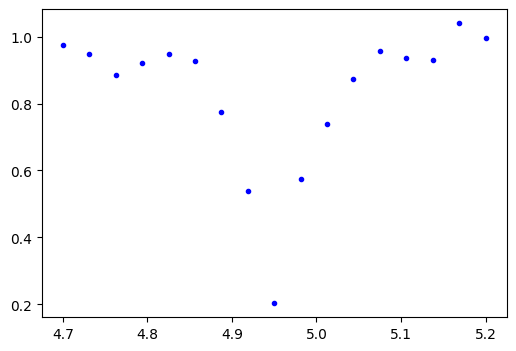

In [40]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def s11(omega, omega_m, alpha, kappa):
    Gamma = (alpha + kappa) / 2
    s11 = 1 - (kappa / (Gamma - 1j * (omega - omega_m)))
    return s11

omega = np.linspace(4.7, 5.2, 17)  # (GHz)
omega_m = 4.95
omega_c = 0 
kappa = 0.04  # (GHz)
alpha = 0.06  # (GHz)
beta = 0.0016  # (GHz)
gamma = 0.0016  # (GHz)

data = s11(omega, omega_m, alpha, kappa)

# 添加隨機噪聲
noise = np.random.normal(0, 0.05, data.shape)
data_noisy = data + noise

plt.figure(figsize=(6, 4))
plt.plot(omega, abs(data_noisy), 'b.')
plt.show()


fitted result:
>> omega_m = 4.949788884233615
>> alpha = 0.0620110584309145
>> kappa = 0.04094696964700988


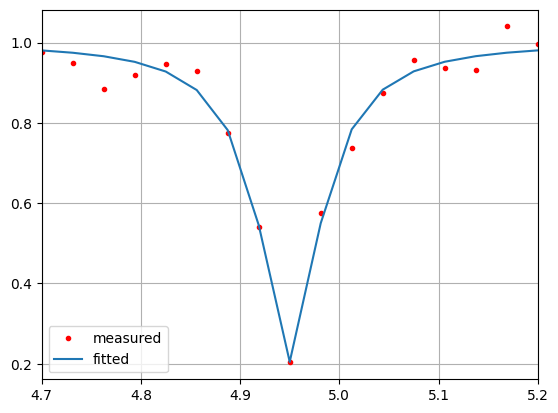

<function matplotlib.pyplot.show(close=None, block=None)>

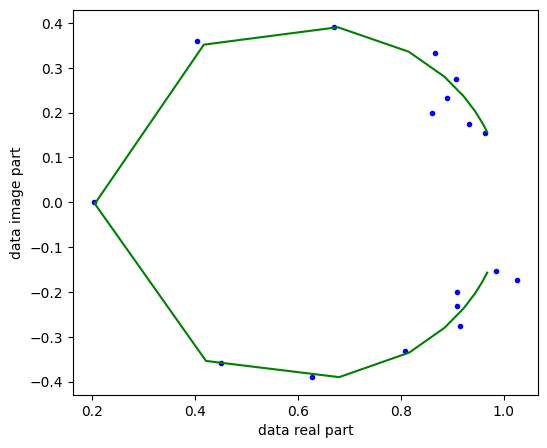

In [41]:
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
#from sklearn.metrics import r2_score
import inspect

pi = np.pi
trace_no = 101


def s11( omega, omega_m, alpha, kappa):
    Gamma = (alpha + kappa )/ 2
    s11 =( 1 - (kappa / (Gamma - 1j*(omega - omega_m))))
    return np.hstack([s11.real, s11.imag])

f_used, s11_used = omega,data_noisy
param_names = list(inspect.signature(s11).parameters.keys())[1:]
mix = np.hstack([(s11_used).real, (s11_used).imag])

strpts = np.array([4.982, 0.0042, 0.0063])# starting points

coeffs, cov = curve_fit(
    s11,
    f_used,
    mix,
    bounds=([4, 0, 0], [np.inf, 1, 1]),
    p0=strpts,
    
)
#omega_c1, omega_m1, kappa1, gamma1, c1  = coeffs

print('fitted result:')
for name, value in zip(param_names, coeffs):
    print(f">> {name} = {value}")   
        
#y_pred = abs_s21(f_used, *coeffs)
#R2 = r2_score(s21_measured, y_pred)
#print(f'with R-squared value R^2 = {R2:.4f}')

s11_fit = s11(f_used, *coeffs)
midpoint = s11_fit.shape[-1] // 2

real_part = s11_fit[:midpoint]
imag_part = s11_fit[midpoint:]

sum = real_part + 1j*imag_part


plt.plot(f_used, abs(s11_used), 'r .', label='measured')
plt.plot(f_used, abs(sum), label='fitted')
plt.xlim(np.min(f_used), np.max(f_used))
#plt.title(f'Trace Fitting tr.{trace_no}')
plt.legend()
plt.grid()
plt.savefig('fitting_result.png', dpi =300)
plt.show() 

plt.figure(figsize=(6,5))
plt.plot(np.real(data_noisy), np.imag(data_noisy),'b.')
plt.plot(np.real(sum), np.imag(sum),'g-')
plt.xlabel('data real part')
plt.ylabel('data image part')
plt.title
plt.show

In [43]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import inspect

# Constants
pi = np.pi
trace_no = 101

# Define the S11 model
def s11(omega, omega_m, alpha, kappa):
    Gamma = (alpha + kappa) / 2
    s11 = 1 - (kappa / (Gamma - 1j * (omega - omega_m)))
    return np.hstack([s11.real, s11.imag])

# Fitting and Plotting functions
def fit_and_plot(frequencies, s11_data, initial_guess, bounds, trace_no):
    # Extract parameter names
    param_names = list(inspect.signature(s11).parameters.keys())[1:]

    # Curve fitting
    coeffs, cov = curve_fit(
        s11,
        frequencies,
        ydata=np.hstack([s11_data.real, s11_data.imag]),
        bounds=bounds,
        p0=initial_guess,
    )

    # Print fitted results
    print("Fitted parameters:")
    for name, value in zip(param_names, coeffs):
        print(f">> {name} = {value:.6f}")
    
    # Reconstruct S11 from fitted data
    s11_fit = s11(frequencies, *coeffs)
    midpoint = s11_fit.shape[-1] // 2
    real_part = s11_fit[:midpoint]
    imag_part = s11_fit[midpoint:]
    s11_reconstructed = real_part + 1j * imag_part

    # Plot results
    plot_results(frequencies, s11_data, s11_reconstructed, trace_no)

    return coeffs, cov

# Plot function
def plot_results(frequencies, measured_data, fitted_data, trace_no):
    plt.figure(figsize=(10, 6))
    
    # Plot measured and fitted data
    plt.plot(frequencies, abs(measured_data), 'r.', label='Measured |S11|')
    plt.plot(frequencies, abs(fitted_data), 'b-', label='Fitted |S11|')
    plt.title(f"Trace Fitting: Trace No. {trace_no}")
    plt.xlabel("Frequency (GHz)")
    plt.ylabel("|S11|")
    plt.legend()
    plt.grid(True)
    plt.savefig('fitting_result.png', dpi=300)
    plt.show()

    # Real vs Imaginary Plot
    plt.figure(figsize=(6, 6))
    plt.plot(measured_data.real, measured_data.imag, 'b.', label='Measured')
    plt.plot(fitted_data.real, fitted_data.imag, 'ro', label='Fitted')
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.title(f'Real vs Imaginary (Trace {trace_no})')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example Inputs
screen = 0  # Placeholder for valid screen index
frq = np.linspace(4.9, 5.1, 500) * 1e9  # Frequency range in Hz
data = np.random.random((10, 200)) + 1j * np.random.random((10, 200))  # Dummy data

# Simulated input
frequencies = frq / 1e9  # Convert to GHz
s11_data = data[screen, trace_no: trace_no + 1].ravel()

# Starting parameters and bounds
initial_guess = np.array([4.985, 0.0042, 0.0063])  # Starting points for parameters
bounds = ([0, 0, 0], [100, 100, 100])  # Bounds for omega_m, alpha, kappa

# Fit and plot
fit_and_plot(frequencies, s11_data, initial_guess, bounds, trace_no)


ValueError: operands could not be broadcast together with shapes (1000,) (2,) 